In [2]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [3]:
#importing final dataset for training
df_dev = pd.read_csv(r'D:\Coding\projects\usurious_sisters\final_dataset\final_data_v1.csv')
df_dev.head()

ID  BranchID  Tenure  AssetCost  AmountFinance  DisbursalAmount      EMI  \
0   1         1      48     450000       275000.0         275000.0  24000.0   
1   2       333      47     485000       350000.0         350000.0  10500.0   
2   3         1      68     690000       519728.0         519728.0  38300.0   
3   7       125      48     480000       400000.0         400000.0  11600.0   
4   8       152      44     619265       440000.0         440000.0  15000.0   

    AssetID  ManufacturerID  SupplierID  ...  dummy_WEST BENGAL  \
0   4022465            1568       21946  ...                  0   
1   4681175            1062       34802  ...                  0   
2  25328146            1060      127335  ...                  0   
3  13021591            1060       25094  ...                  0   
4   3291320            1046       21853  ...                  0   

   SUM(DISBURSED-AMT/HIGH CREDIT)  SUM(CURRENT-BAL)  OTHERS-DISBURSED  \
0                         2201352            618526         1926352.0   
1                        18117081          10349457        17767081.0   
2                         3708369           2065165         3188641.0   
3                         1272553            624000          872553.0   
4                         2025216            974119         1585216.0   

   Disbursal_Dt  Maturity_Dt     Auth_Dt  Disbursal_Dt_U  Maturity_Dt_U  \
0    2012-02-10   2016-01-15  2012-02-10    1.328812e+09   1.452796e+09   
1    2012-03-31   2016-02-15  2012-03-31    1.333132e+09   1.455475e+09   
2    2017-06-17   2023-02-10  2017-06-17    1.497638e+09   1.675967e+09   
3    2013-11-29   2017-11-10  2013-11-29    1.385663e+09   1.510252e+09   
4    2011-12-08   2015-07-05  2011-12-08    1.323283e+09   1.436035e+09   

      Auth_Dt_U  
0  1.328812e+09  
1  1.333132e+09  
2  1.497638e+09  
3  1.385663e+09  
4  1.323283e+09  

[5 rows x 56 columns]

In [4]:
#printing column names
df_dev.columns

Index(['ID', 'BranchID', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'AssetID', 'ManufacturerID', 'SupplierID',
       'LTV', 'AGE', 'MonthlyIncome', 'ZiPCODE', 'ASSN_CAT', 'LOAN_STATUS',
       'INS_MODE', 'dummy_BI-Monthly', 'dummy_Half Yearly', 'dummy_Monthly',
       'dummy_Quatrly', 'dummy_automated', 'dummy_cheque',
       'dummy_discretionary', 'dummy_reject', 'dummy_ANDHRA PRADESH',
       'dummy_ASSAM', 'dummy_BIHAR', 'dummy_CHANDIGARH', 'dummy_CHATTISGARH',
       'dummy_DADRA AND NAGAR HAVELI', 'dummy_DELHI', 'dummy_GUJARAT',
       'dummy_HARYANA', 'dummy_HIMACHAL PRADESH', 'dummy_JHARKHAND',
       'dummy_KARNATAKA', 'dummy_MADHYA PRADESH', 'dummy_MAHARASHTRA',
       'dummy_ORISSA', 'dummy_PUNJAB', 'dummy_RAJASTHAN', 'dummy_TAMIL NADU',
       'dummy_TELANGANA', 'dummy_UTTAR PRADESH', 'dummy_UTTARAKHAND',
       'dummy_WEST BENGAL', 'SUM(DISBURSED-AMT/HIGH CREDIT)',
       'SUM(CURRENT-BAL)', 'OTHERS-DISBURSED', 'Disbursal_Dt', 'Maturity_Dt',


In [5]:
#creating X and Y variables for model
X_miss_xgb = df_dev[['ID', 'BranchID', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'AssetID', 'ManufacturerID', 'SupplierID',
       'LTV', 'AGE', 'MonthlyIncome', 'ZiPCODE', 'LOAN_STATUS',
       'INS_MODE', 'dummy_BI-Monthly', 'dummy_Half Yearly', 'dummy_Monthly',
       'dummy_Quatrly', 'dummy_automated', 'dummy_cheque',
       'dummy_discretionary', 'dummy_reject', 'dummy_ANDHRA PRADESH',
       'dummy_ASSAM', 'dummy_BIHAR', 'dummy_CHANDIGARH', 'dummy_CHATTISGARH',
       'dummy_DADRA AND NAGAR HAVELI', 'dummy_DELHI', 'dummy_GUJARAT',
       'dummy_HARYANA', 'dummy_HIMACHAL PRADESH', 'dummy_JHARKHAND',
       'dummy_KARNATAKA', 'dummy_MADHYA PRADESH', 'dummy_MAHARASHTRA',
       'dummy_ORISSA', 'dummy_PUNJAB', 'dummy_RAJASTHAN', 'dummy_TAMIL NADU',
       'dummy_TELANGANA', 'dummy_UTTAR PRADESH', 'dummy_UTTARAKHAND',
       'dummy_WEST BENGAL', 'SUM(DISBURSED-AMT/HIGH CREDIT)',
       'SUM(CURRENT-BAL)', 'OTHERS-DISBURSED', 'Disbursal_Dt_U', 'Maturity_Dt_U', 'Auth_Dt_U']]
Y_miss_xgb = df_dev[["ASSN_CAT"]]

In [6]:
#confused - what does this step do?
data_dm = xgb.DMatrix(data=X_miss_xgb, label = Y_miss_xgb)

In [7]:
#creating train test split
X_miss_xgb_train, X_miss_xgb_cv, Y_miss_xgb_train, Y_miss_xgb_cv = train_test_split(X_miss_xgb,Y_miss_xgb,test_size = 0.333, random_state = 123)

In [8]:
#defining xgb hyper-parameters
xg_class = xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 1,gamma = 1,
                             subsample = 0.8, learning_rate = 0.01, max_depth = 5, alpha = 10,
                             n_estimators = 1000, multilabel_ =True, num_classes = 3,max_delta_step = 2)

In [9]:
#training the model
xg_class.fit(X_miss_xgb_train, Y_miss_xgb_train)

[19:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { multilabel_, num_classes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=2, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              multilabel_=True, n_estimators=1000, n_jobs=4, num_classes=3,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

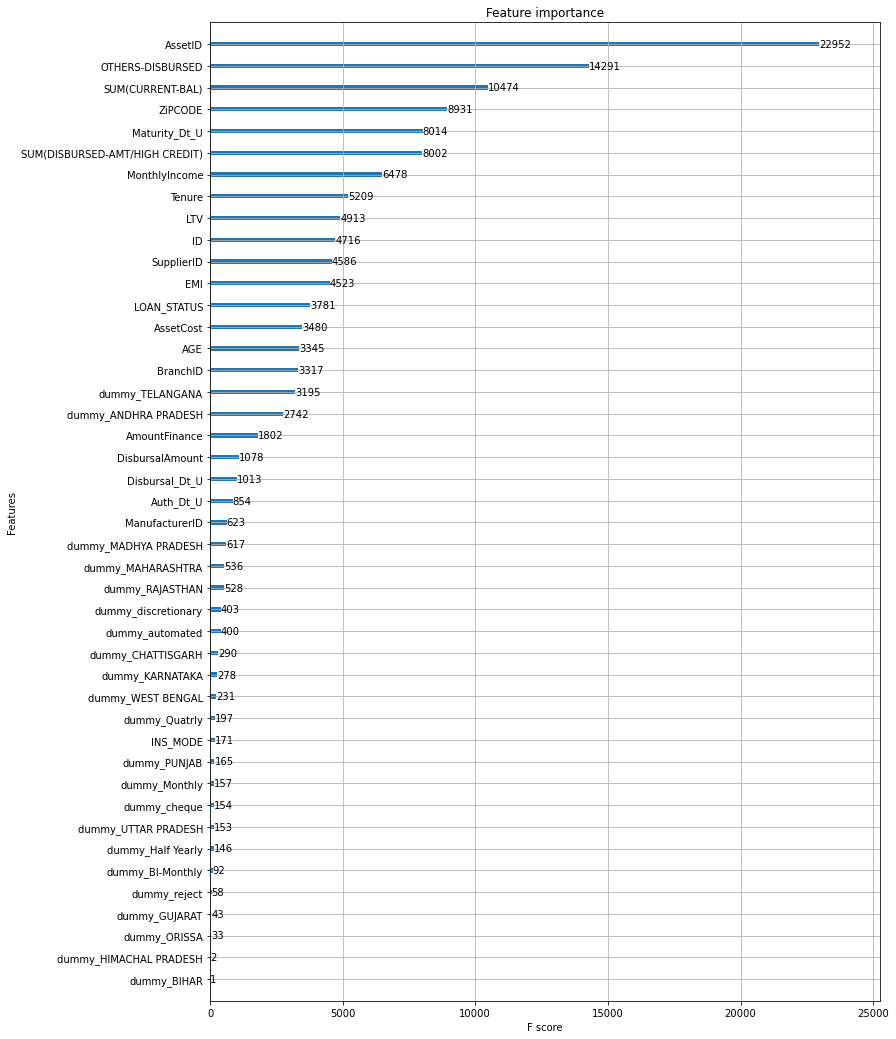

In [11]:
#generating feature importance plot
xgb.plot_importance(xg_class)
plt.rcParams['figure.figsize'] = [12,18]
plt.show()

## Testing on Cross Validation Set

In [12]:
#testing on cross validation set
preds_miss_xgb = xg_class.predict(X_miss_xgb_cv)

In [13]:
preds_miss_xgb_df = pd.DataFrame(preds_miss_xgb)
preds_miss_xgb_df.rename(columns = {0:'predictions'},inplace = True)

In [14]:
Y_miss_xgb_test_nind = Y_miss_xgb_cv.reset_index()
Y_miss_xgb_test_nind.drop(['index'],axis = 1, inplace = True)
preds_actuals_df = pd.concat([Y_miss_xgb_test_nind, preds_miss_xgb_df], axis = 1)
preds_actuals_df

ASSN_CAT  predictions
0             0            0
1             0            0
2             0            0
3             0            0
4             5            0
...         ...          ...
42838         0            0
42839         0            0
42840         6            0
42841         0            0
42842         0            0

[42843 rows x 2 columns]

In [15]:
#calculating the f1 score
score = sklearn.metrics.f1_score(preds_actuals_df['ASSN_CAT'],preds_actuals_df['predictions'], average = 'weighted')
print(score)

0.7702648026738191


## Testing on Test dataset 